In [1]:
# packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Basketball court drawing
# https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc:
    ax.add_artist(matplotlib.patches.Arc((0, 140), 440, 315, theta1=0,
                                  theta2=180, facecolor='none', edgecolor=color, lw=2))

    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(matplotlib.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(matplotlib.patches.Circle((0, 60), 15, facecolor='none', edgecolor='red', lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color='red')

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    return ax

In [3]:
df = pd.read_csv('dataset.csv')
df.sample(30)

,PLAYER_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
2765,LeBron James,4,1,14,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-1,2,1,1
2777,LeBron James,3,10,12,Driving Floating Bank Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-17,29,1,1
2068,LeBron James,4,2,18,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-2,-5,1,1
1873,Michael Jordan,1,8,20,Running Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,13,-125,52,1,1
1772,Michael Jordan,3,8,20,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,118,210,1,0
2848,LeBron James,4,7,49,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,20,5,204,1,0
2658,LeBron James,4,5,17,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-24,2,1,1
1188,Michael Jordan,1,9,37,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0
807,Michael Jordan,3,3,25,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-14,49,1,1
912,Michael Jordan,2,0,45,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,24,-235,52,1,0


In [4]:
# going to split the data frames up by player instead of having them combined

mj_df = df[df['PLAYER_NAME']=='Michael Jordan']
lbj_df = df[df['PLAYER_NAME']=='LeBron James']

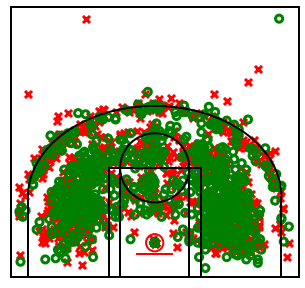

In [5]:
 # Michael Jordan
 # General plot parameters
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2

# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

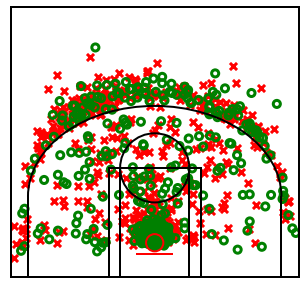

In [6]:
# LeBron James
# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# Function to create zone specific shot charts

def create_zone_chart(shot_type, shot_zone_area, player):
    fig = plt.figure(figsize=(4,3.76))
    ax = fig.add_axes([0, 0, 1, 1])
    ax = create_court(ax, 'black')

    x_missed_center = lbj_df[(lbj_df['SHOT_MADE_FLAG'] == 0) & (lbj_df['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (lbj_df['SHOT_TYPE'] == shot_type)]['LOC_X']
    y_missed_center = lbj_df[(lbj_df['SHOT_MADE_FLAG'] == 0) & (lbj_df['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (lbj_df['SHOT_TYPE'] == shot_type)]['LOC_Y'] + 60

    x_made_center = lbj_df[(lbj_df['SHOT_MADE_FLAG'] == 1) & (lbj_df['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (lbj_df['SHOT_TYPE'] == shot_type)]['LOC_X']
    y_made_center = lbj_df[(lbj_df['SHOT_MADE_FLAG'] == 1) & (lbj_df['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (lbj_df['SHOT_TYPE'] == shot_type)]['LOC_Y'] + 60

    ax.scatter(x_missed_center, y_missed_center, c='r', marker='x', s = 50, linewidths=3)
    ax.scatter(x_made_center, y_made_center, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)
    ax.text(0,1.05,player + ': '+ shot_zone_area + ' '+ shot_type +'s' + '\n'+ str("{:.2%}".format(len(x_made_center)/len((x_made_center+x_missed_center)))) +
            ' on '+ str(len(x_made_center)) + ' out of '+ str(len(x_made_center + x_missed_center)) + ' shooting',
            transform = ax.transAxes, ha='left', va='baseline')
    # plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
    plt.show()

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


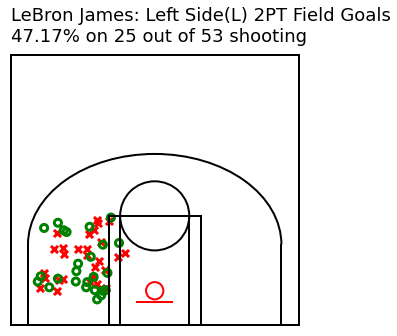

In [9]:
# LeBron James - Left Side 2 Pointers
create_zone_chart('2PT Field Goal', 'Left Side(L)', 'LeBron James')

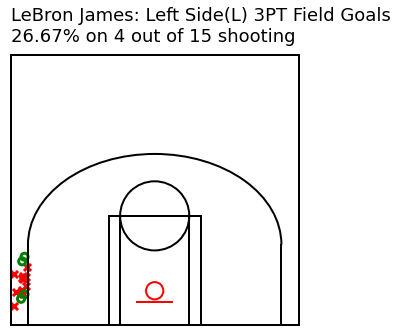

In [10]:
# LeBron James - Left Side 3 Pointers
create_zone_chart('3PT Field Goal', 'Left Side(L)', 'LeBron James')

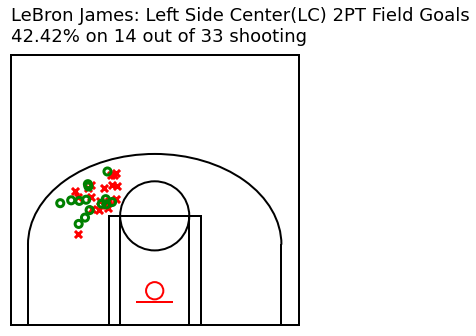

In [11]:
# LeBron James - Left Side Center 2 Pointers
create_zone_chart('2PT Field Goal', 'Left Side Center(LC)', 'LeBron James')

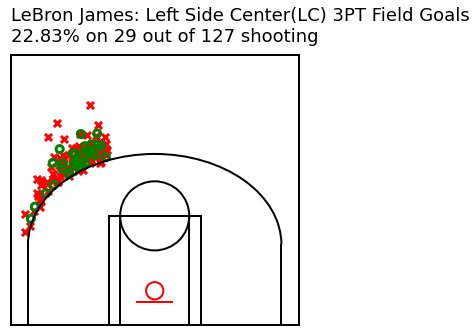

In [12]:
# LeBron James - Left Side Center 3 Pointers
create_zone_chart('3PT Field Goal', 'Left Side Center(LC)', 'LeBron James')

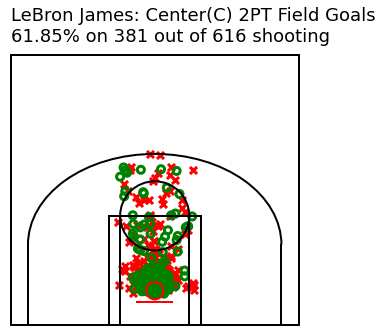

In [13]:
# LeBron James - Center 2 Pointers
create_zone_chart('2PT Field Goal', 'Center(C)', 'LeBron James')

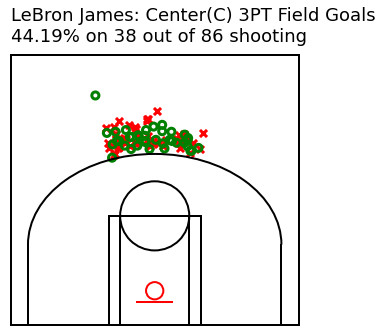

In [14]:
# LeBron James - Center 3 Pointers
create_zone_chart('3PT Field Goal', 'Center(C)', 'LeBron James')

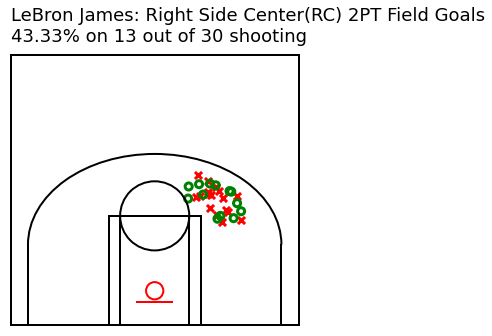

In [15]:
# LeBron James - Right Side Center 2 Pointers
create_zone_chart('2PT Field Goal', 'Right Side Center(RC)', 'LeBron James')

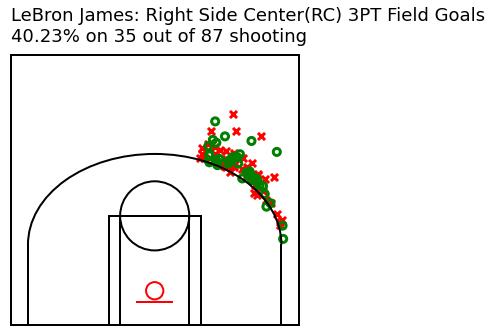

In [16]:
# LeBron James - Right Side Center 3 Pointers
create_zone_chart('3PT Field Goal', 'Right Side Center(RC)', 'LeBron James')

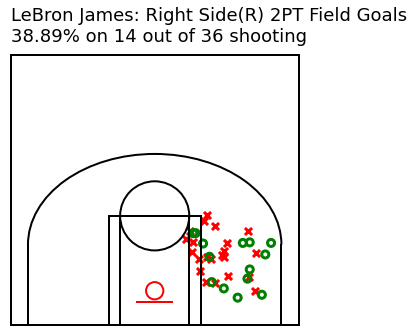

In [17]:
# LeBron James - Right Side 2 Pointers
create_zone_chart('2PT Field Goal', 'Right Side(R)', 'LeBron James')

In [ ]:
# LeBron James - Right Side 3 Pointers
create_zone_chart('3PT Field Goal', 'Right Side(R)', 'LeBron James')